<a href="https://colab.research.google.com/github/ronaldobresende/folhauol-text-mining/blob/main/Question%C3%A1rio_Projeto_de_Disciplina_de_Text_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instruções para baixar os dados

Para baixar os dados será necessário o uso do gerenciador de downloads da Kaggle. A Kaggle, uma subsidiária do grupo Alphabet (Google), é uma comunidade on-line de cientistas de dados e profissionais de aprendizado de máquina.

Para utilizar o gerenciador, será necessário criar uma conta no site Kaggle.com.
Com a conta criada, obtenha um token de acesso, no formato kaggle.json

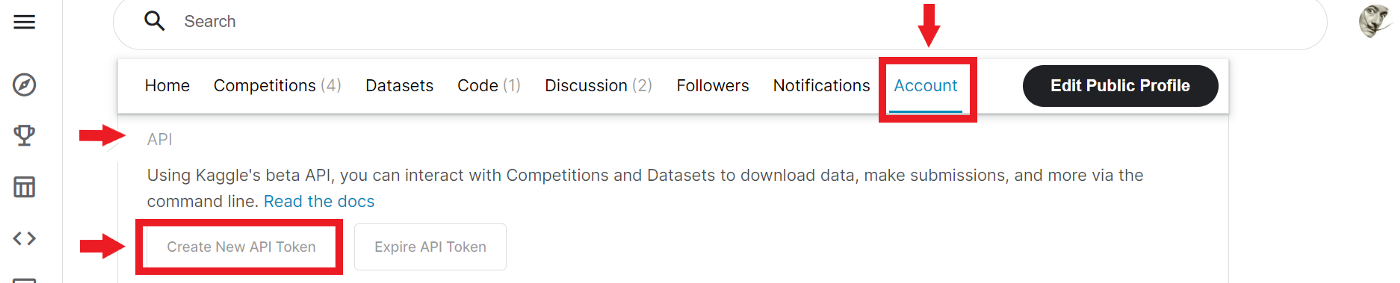

#Célula 01
# Projeto de Disciplina de Processamento de Linguagem Natural com Python

Bem-vindo ao projeto de disciplina de **Processamento de Linguagem Natural com Python**. Ao longo das últimas aulas vimos uma série de aplicações que nos deram a amplitude de possibilidades em trabalhar com textos. Para tal, usamos diversas bibliotecas, onde as que mais se destacaram foram NLTK, SPACY e GENSIM.

Esse notebook servirá de guia para a execução de uma análise de tópicos completa, usando o algoritmo de LDA e recursos para interpretação dos resultados. Utilizaremos notícias da seção "Mercado" extraídas da Folha de S. Paulo no ano de 2016.  Complete a análise com os códigos que achar pertinente e responda as questões presentes no Moodle. Boa sorte!

## O Notebook

Nesse notebook, você será guiado pela análise de **Extração de Tópicos**. As seguintes tarefas serão realizadas


1.   Download dos dados provenientes do kaggle
2.   Seleção dos dados relevantes para a nossa análise
3.   Instalação das principais ferramentas e importação de módulos
4.   Pré-processamento usando NLTK
5.   Pré-processamento usando Spacy
6.   Análise de tópicos usando LDA
7.   Análise de NER usando Spacy
8.   Visualização dos tópicos usando tokens e entidades.



Em posse do token (baixe para seu computador), execute a células da próxima seção para acessar os dados de interesse e baixá-los.

# Baixe os dados

Instale o gerenciador kaggle no ambiente do Colab e faça o upload do arquivo kaggle.json

In [2]:
#Célula 02
!pip install -q kaggle
!rm -rf kaggle.json
from google.colab import files

files.upload()

Saving news-of-the-site-folhauol.zip to news-of-the-site-folhauol.zip


Crie a pasta .kaggle

In [3]:
#Célula 03
!rm -rf .kaggle
!mkdir .kaggle
!cp kaggle.json .kaggle/
!chmod 600 .kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '.kaggle/kaggle.json': No such file or directory


In [6]:
import os
os.environ['KAGGLE_USERNAME'] = 'ronaldobresende'
os.environ['KAGGLE_KEY'] = '003ef036f9085dda266a81916aa3ad8c'

Baixe o dataset

In [7]:
#Célula 04
!kaggle datasets download --force -d marlesson/news-of-the-site-folhauol

Dataset URL: https://www.kaggle.com/datasets/marlesson/news-of-the-site-folhauol
License(s): CC0-1.0
 92% 172M/187M [00:00<00:00, 642MB/s] 
100% 187M/187M [00:00<00:00, 637MB/s]


## Criar o DataFrame com os dados lidos diretamente da plataforma Kaggle

In [8]:
#Célula 05
import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()

df = pd.read_csv("news-of-the-site-folhauol.zip")

# Atualizar o SPACY e  instalar os modelos pt_core_news_lg

In [9]:
# Escreva seu código aqui
#Célula 06
!pip install -U spacy
!python -m spacy download pt_core_news_lg

import spacy
from spacy.lang.pt.stop_words import STOP_WORDS

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 60.3 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.8.5
    Uninstalling spacy-3.8.5:
      Successfully uninstalled spacy-3.8.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 1.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Instalar os datasets `stopwords`, `punkt` e `rslp` do nltk

In [11]:
#Célula 07
import nltk

# Escreva seu código aqui
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('rslp')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Carregar os módulos usados ao longo desse notebook

In [12]:
#Célula 08
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import numpy as np

from wordcloud import WordCloud

import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain

from typing import List, Set, Any

SEED = 123

# Filtrando os dados para utilizar apenas as notícias do ano de 2016 e da categoria "Mercado"

Filtre os dados do DataFrame df e crie um DataFrame news_2016 que contenha apenas notícias de **2016** e da categoria **mercado**.

In [13]:
#Célula 09
df['date'] = pd.to_datetime(df.date)
# Create a dataframe named news_2016
news_2016 = df[(df['date'].dt.year == 2016) & (df['category'].str.lower() == 'mercado')].copy()

print(news_2016.shape)
news_2016.head()

(7943, 6)


,title,text,date,category,subcategory,link
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...


## NLTK Tokenizer and Stemmer

Crie uma coluna no dataframe `news_2016` contendo os tokens para cada um dos textos. Os tokens devem estar representados pelo radical das palavras (stem).
Para tal, complete o conteúdo da função `tokenize`.

In [18]:
#Célula 10
import re
from nltk.tokenize import word_tokenize
from nltk.stem import RSLPStemmer
from nltk.corpus import stopwords

stemmer = RSLPStemmer()

def tokenize(text: str) -> List:
  """
  Function for tokenizing using `nltk.tokenize.word_tokenize`

  Returns:
    - A list of stemmed tokens (`nltk.stem.RSLPStemmer`)
    IMPORTANT: Only tokens with alphabetic
               characters will be returned.
  """
  #escreva seu código aqui
  text = text.lower()
  text = re.sub(r'[^a-z\s]', '', text)
  tokens = word_tokenize(text, language='portuguese')
  custom_stop_words = set(stopwords.words('portuguese'))
  cleaned_tokens = [token for token in tokens if token not in custom_stop_words]
  cleaned_tokens = [token for token in cleaned_tokens if len(token) > 2]
  cleaned_tokens = [stemmer.stem(word) for word in cleaned_tokens]
  return ' '.join(cleaned_tokens)

news_2016.loc[:, 'nltk_tokens'] = news_2016.text.progress_map(tokenize)

  0%|          | 0/7943 [00:00<?, ?it/s]

## Criar uma documento SPACY para cada texto do dataset

Crie uma coluna `spacy_doc` que contenha os objetos spacy para cada texto do dataset de interesse. Para tal, carregue os modelos `pt_core_news_lg` e aplique em todos os textos (pode demorar alguns minutos...)

In [19]:
#Célula 11
# Escreva seu código aqui

nlp = spacy.load("pt_core_news_lg")

news_2016.loc[:, 'spacy_doc'] = news_2016.text.progress_map(nlp)

  0%|          | 0/7943 [00:00<?, ?it/s]

## Realize a Lematização usando SPACY

O modelo NLP do spacy oferece a possiblidade de lematizar textos em português (o que não acontece com a biblioteca NLTK). Iremos criar uma lista de tokens
lematizados para cada texto do nosso dataset. Para tal, iremos retirar as
stopwords, usando uma função que junta stopwords provenientes do NLTK e do Spacy. Essa lista completa, é retornada pela função stopwords (e você não precisa mexer).

Já a função filter retorna True caso o token seja composto por caracters alfabéticos, não estiver dentro da lista de stopwords e o lemma resultante não estiver contido na lista `o", "em", "em o", "em a" e "ano"`.

Crie uma coluna chamada `spacy_lemma` para armazenar o resultado desse pré-processamento.

In [20]:
#Célula 12
def stopwords() -> Set:
    """
    Return complete list of stopwords
    """
    return set(list(nltk.corpus.stopwords.words("portuguese")) + list(STOP_WORDS))

complete_stopwords = stopwords()

def filter(w: spacy.lang.pt.Portuguese) -> bool:
    """
    Filter stopwords and undesired tokens
    """
    return (
        w.is_alpha and
        w.lemma_.lower() not in complete_stopwords and
        w.lemma_.lower() not in ["o", "em", "em o", "em a", "ano"]
    )

def lemma(doc: spacy.lang.pt.Portuguese) -> List[str]:
    """
    Apply spacy lemmatization on the tokens of a text

    Returns:
       - a list representing the standardized (with lemmatisation) vocabulary
    """
    # Escreva seu cógigo aqui
    #return [w.lemma_.lower() for w in doc if filter(w)]

    tokens =  [token.lemma_ for token in doc if (len(token) > 2) and token.is_alpha and not token.is_stop]

    return tokens

news_2016.loc[:, 'spacy_lemma'] = news_2016.spacy_doc.progress_map(lemma)

  0%|          | 0/7943 [00:00<?, ?it/s]

## Reconhecimento de entidades nomeadas

Crie uma coluna `spacy_ner` que armazene todas as organizações (APENAS organizações) que estão contidas no texto.

In [21]:
#Célula 13
def NER(doc: spacy.lang.pt.Portuguese):
  """
  Return the list of organizations for a SPACY document
  """
  # Escreva seu código aqui
  return [ent.text for ent in doc.ents if ent.label_ == "ORG"]

news_2016.loc[:, 'spacy_ner'] = news_2016.spacy_doc.progress_map(NER)

  0%|          | 0/7943 [00:00<?, ?it/s]

## Bag-of-Words

Crie uma coluna `tfidf` no dataframe `news_2016`. Use a coluna `spacy_lemma` como base para cálculo do TFIDF.
O número máximo de features que iremos considerar é 5000. E o token, tem que ter aparecido pelo menos 10 vezes (`min_df`) nos documentos.

In [22]:
#Célula 14
class Vectorizer:
  def __init__(self, doc_tokens: List):
    self.doc_tokens = doc_tokens
    self.tfidf = None


  def vectorizer(self):
      """
      Convert a list of tokens to tfidf vector
      Returns the tfidf vector and attribute it to self.tfidf
      """
      # Escreva seu código aqui
      # Transformar listas de tokens em strings (TFIDF exige string de texto)
      docs = [" ".join(tokens) for tokens in self.doc_tokens]

      # Instanciar e ajustar o TfidfVectorizer
      self.tfidf = TfidfVectorizer(
          lowercase=True,
          stop_words=list(complete_stopwords),
          max_features=5000,
          min_df=10,
          max_df=0.95,
          tokenizer=str.split  # já estamos passando strings tokenizadas
      ).fit(docs)

      return self.tfidf

  def __call__(self):
    if self.tfidf is None:
        self.vectorizer()
    return self.tfidf

doc_tokens = news_2016.spacy_lemma.values.tolist()
vectorizer = Vectorizer(doc_tokens)

def tokens2tfidf(tokens):
    tokens = ' '.join(tokens)
    array =  vectorizer().transform([tokens]).toarray()[0]
    return array


news_2016.loc[:, 'tfidf'] = news_2016.spacy_lemma.progress_map(tokens2tfidf)

  0%|          | 0/7943 [00:00<?, ?it/s]

## Extração de Tópicos

Realize a extração de 9 tópicos usando a implementação do sklearn do algoritmo Latent Dirichlet Allocation. Como parâmetros, você irá usar o número máximo de iterações igual à 100 (pode demorar) e o `random_seed` igual a `SEED` que foi setado no início do notebook

In [23]:
#Célula 15
N_TOKENS = 9

corpus = np.array(news_2016.tfidf.tolist())
#Escreva seu código aqui

lda = LDA(
    n_components=N_TOKENS,
    max_iter=100,
    random_state=SEED,
    learning_method='batch'
)

lda.fit(corpus)

LatentDirichletAllocation(max_iter=100, n_components=9, random_state=123)

### Atribua a cada text, um (e apenas um) tópic.

Crie uma coluna `topic` onde o valor é exatamente o tópico que melhor caracteriza o documento de acordo com o algoritmo de LDA.

In [24]:
#Célula 16
def get_topic(tfidf: np.array):
    """
    Get topic for a lda trained model
    """
    # Escreva seu código aqui
    dtm = pd.DataFrame([tfidf], columns=vectorizer.tfidf.get_feature_names_out())
    topics = lda.transform(dtm.values)
    return np.argmax(topics, axis=1)[0]
    #topic_distribution = lda.transform([tfidf])[0]
    #return int(np.argmax(topic_distribution))

news_2016['topic'] = news_2016.tfidf.progress_map(get_topic)

  0%|          | 0/7943 [00:00<?, ?it/s]

## Número de documentos vs tópicos

Esse gráfico nos mostra quantos documentos foram caracterizados por cada tópico.

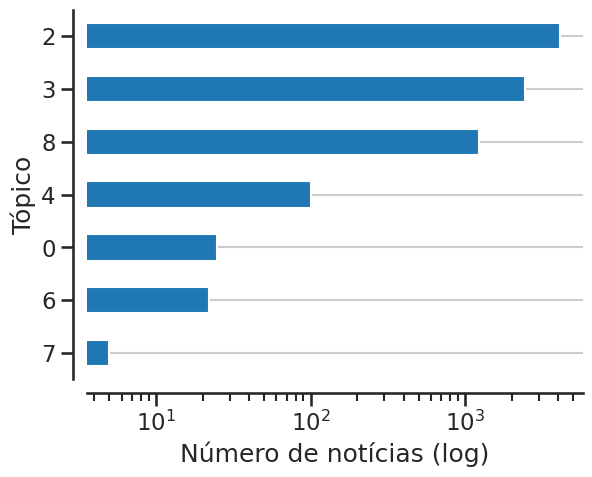

In [25]:
#Célula 17
with sns.axes_style("ticks"):
    sns.set_context("talk")
    ax = news_2016['topic'].value_counts().sort_values().plot(kind = 'barh')
    ax.yaxis.grid(True)
    ax.set_ylabel("Tópico")
    ax.set_xlabel("Número de notícias (log)")
    sns.despine(offset = 10)
    ax.set_xscale("log")

## Crie uma nuvem de palavra para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa.

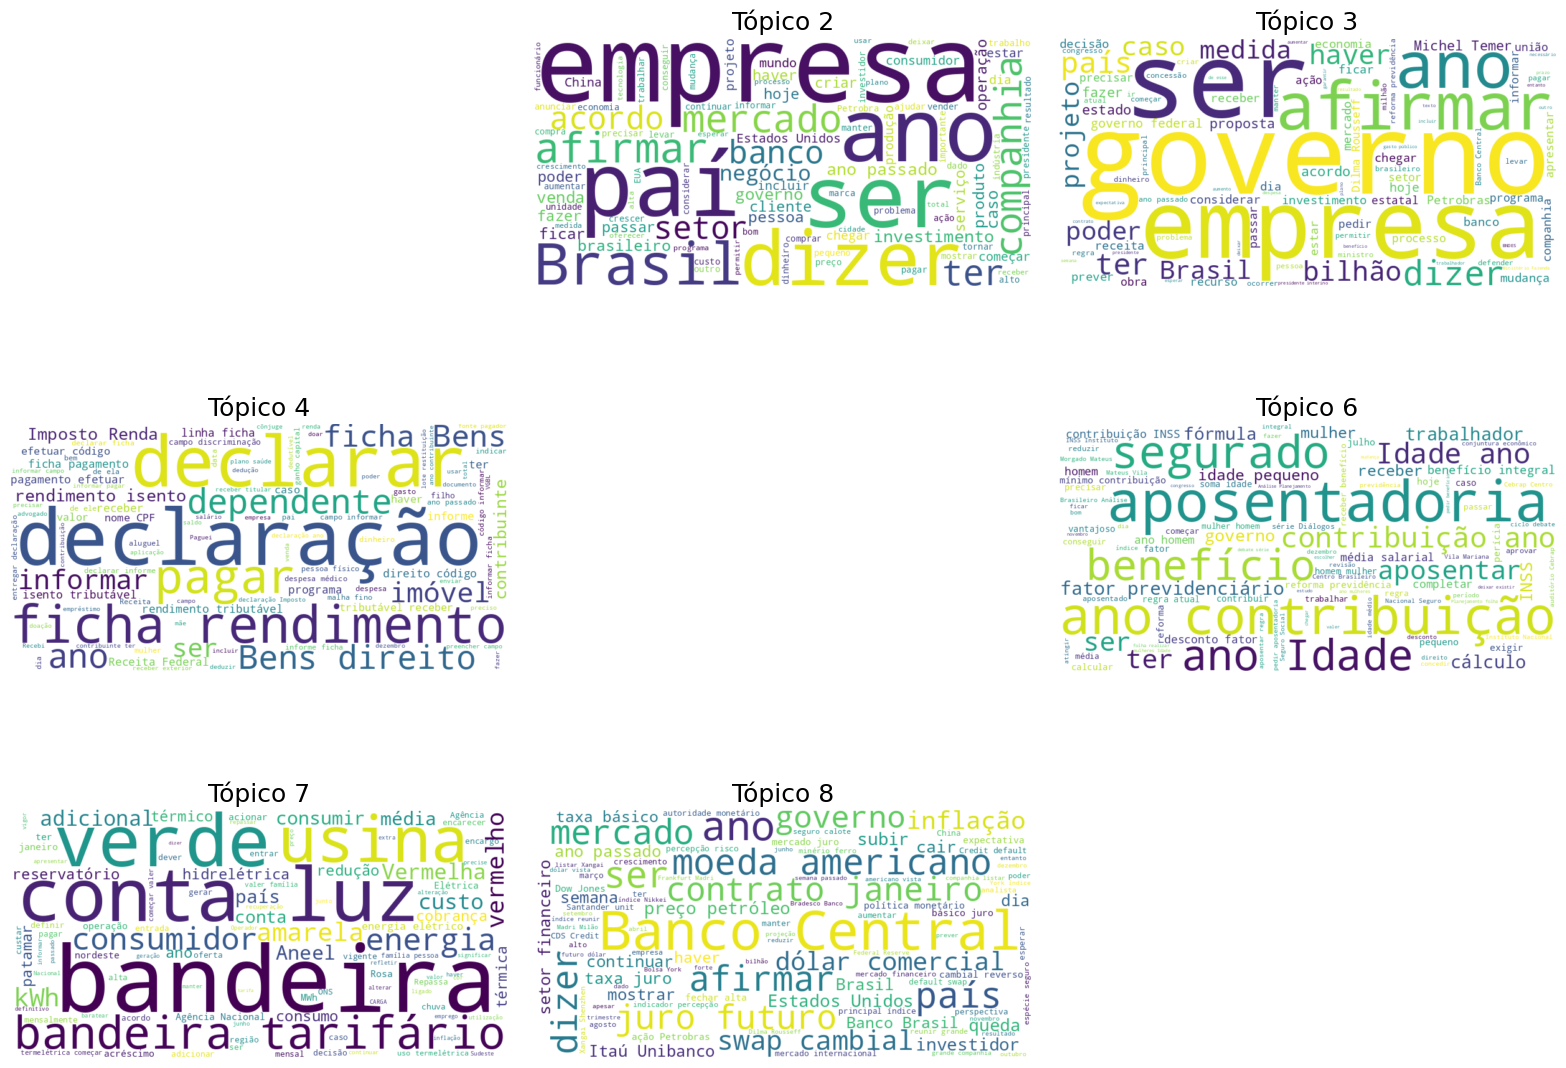

In [26]:
#Célula 18
def plot_wordcloud(text:str, ax:plt.Axes) -> plt.Axes:
    """
    Plot the wordcloud for the text/
    Arguments:
        -  text: string to be analised
        -  ax: plt subaxis
    Returns:
     - ax
    """
    # Escreva seu código aqui
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='viridis').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    return ax

def plot_wordcloud_for_a_topic(topic:int, ax:plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_words = chain(*topic_news.spacy_lemma.values.tolist())
    string_complete = ' '.join(list_of_words)
    if not string_complete:
        return None
    return plot_wordcloud(string_complete, ax)

fig, axis = plt.subplots(3, 3, figsize=(16, 12))

axis_  = axis.flatten()
for idx, ax in enumerate(axis_):
    ax_ = plot_wordcloud_for_a_topic(idx + 1, ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx + 1}")
fig.tight_layout()

## Crie uma nuvem de entidades para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa.

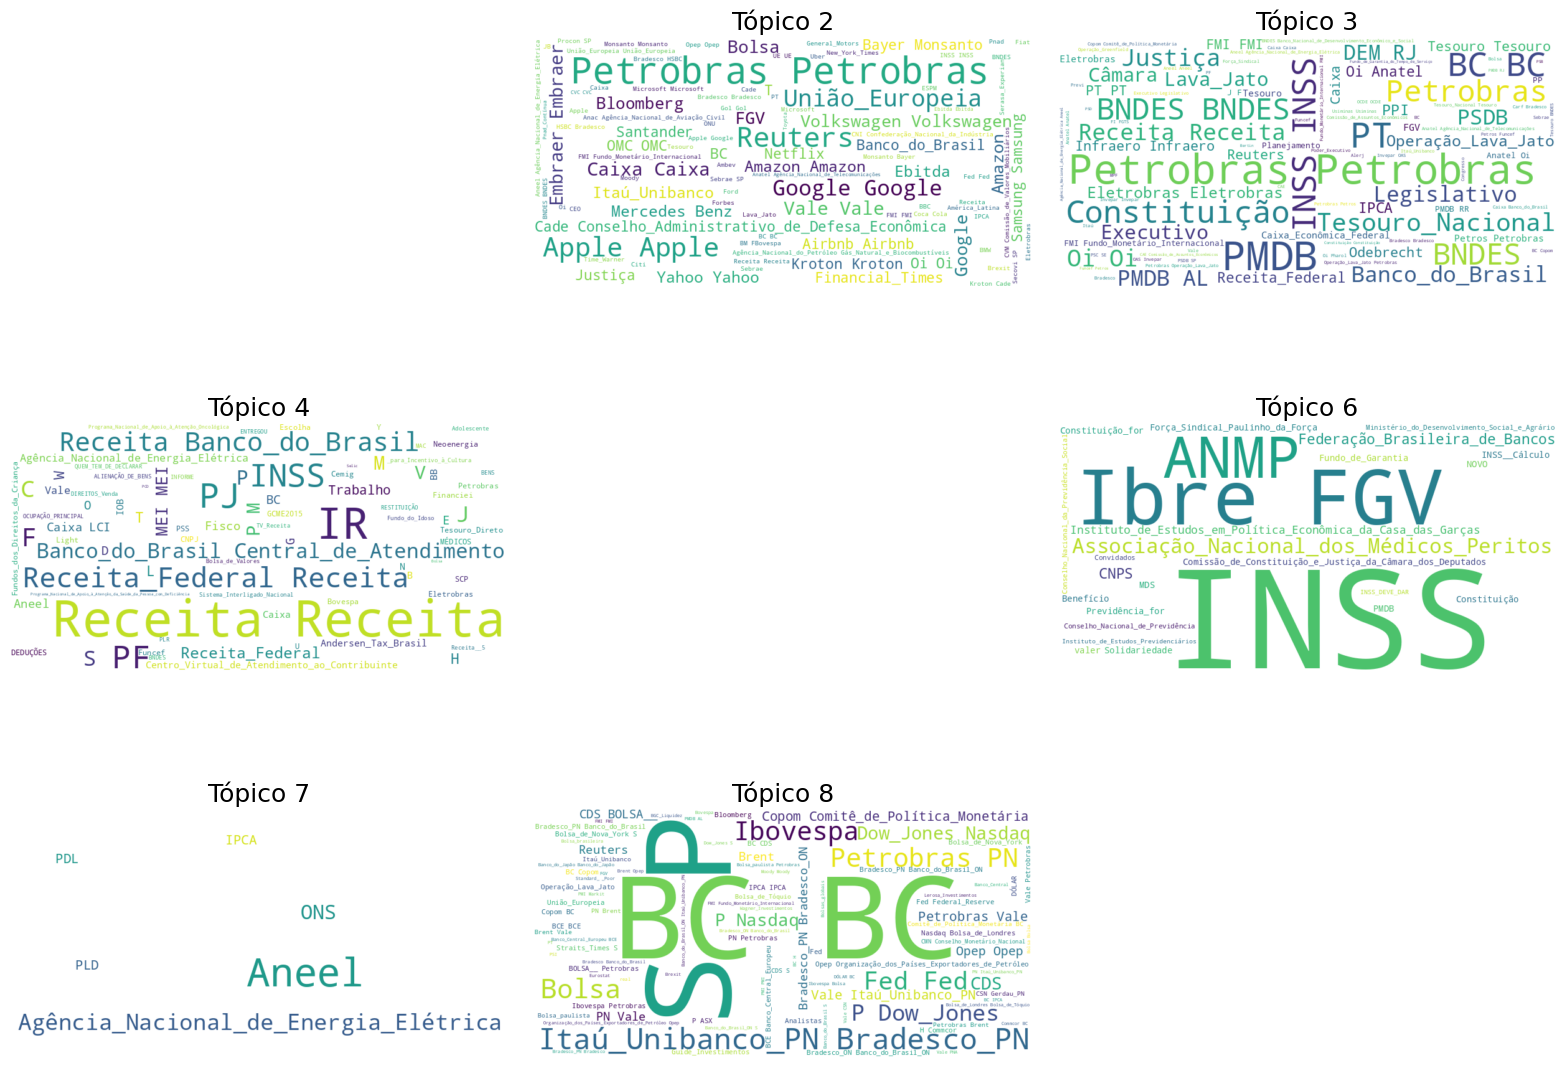

In [28]:
#Célula 19
def plot_wordcloud_entities_for_a_topic(topic:int, ax:plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_docs = topic_news.spacy_ner.apply(lambda l : [w.replace(" ", "_") for w in l])
    list_of_words = chain(*list_of_docs)
    string_complete = ' '.join(list_of_words)
    if not len(string_complete):
        return None
    return plot_wordcloud(string_complete, ax)

fig, axis = plt.subplots(3, 3, figsize=(16, 12))

axis_  = axis.flatten()
for idx, ax in enumerate(axis_):
    ax_ = plot_wordcloud_entities_for_a_topic(idx + 1, ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx + 1}")
fig.tight_layout()

## Questões relacionadas às competências

**Implementar técnicas de lematização:**

*   **1. Qual o endereço do seu notebook (colab) executado? Use o botão de compartilhamento do colab para obter uma url.**

    https://colab.research.google.com/github/ronaldobresende/folhauol-text-mining/blob/main/Question%C3%A1rio_Projeto_de_Disciplina_de_Text_Mining.ipynb

*   **2. Em qual célula está o código que realiza o download dos pacotes necessários para tokenização e stemming usando nltk?**

    Célula 07

*   **3. Em qual célula está o código que atualiza o spacy e instala o pacote pt_core_news_lg?**
    Célula 06

*   **4. Em qual célula está o download dos dados diretamente do kaggle?**
    Célula 04

*   **5. Em qual célula está a criação do dataframe news_2016 (com examente 7943 notícias)?**
    Célula 09

*   **6. Em qual célula está a função que tokeniza e realiza o stemming dos textos usando funções do nltk?**
    Célula 10

*   **7. Em qual célula está a função que realiza a lematização usando o spacy?**
    Célula 12

*   **8. Baseado nos resultados qual a diferença entre stemming e lematização, qual a diferença entre os dois procedimentos? Escolha quatro palavras para exemplificar.**
    **Diferença Principal:** A lematização tenta encontrar a forma base (lema) de uma palavra, que é uma palavra real em um dicionário (ex: "correndo" -> "correr"). O stemming, por outro lado, simplesmente remove sufixos e prefixos para encontrar a raiz da palavra, que pode não ser uma palavra real (ex: "correndo" -> "corr"). A lematização geralmente é mais precisa, mas também mais computacionalmente custosa.

    **Exemplos:**
    *   Palavra: correndo
        *   Stemming: corr
        *   Lematização: correr
    *   Palavra: casas
        *   Stemming: cas
        *   Lematização: casa
    *   Palavra: carros
        *   Stemming: carr
        *   Lematização: carro
    *   Palavra: falava
        *   Stemming: falav
        *   Lematização: falar

**Construir um modelo de reconhecimento de entidades (NER) usando Spacy**

*   **9. Em qual célula o modelo pt_core_news_lg está sendo carregado? Todos os textos do dataframe precisam ser analisados usando os modelos carregados. Em qual célula isso foi feito?**

    Carregamento do modelo pt_core_news_lg: Célula 11
    Análise dos textos com os modelos carregados: Célula 12

*   **10. Indique a célula onde as entidades dos textos foram extraídas. Estamos interessados apenas nas organizações.**

    Célula 13

*   **11. Cole a figura gerada que mostra a nuvem de entidades para cada tópico obtido (no final do notebook)**

    A figura gerada que mostra a nuvem de entidades para cada tópico obtido foi plotada na Célula 19

**Criar modelos utilizando vetorização de textos baseado em Bag of Words**

*   **12. Quando adotamos uma estratégia frequentista para converter textos em vetores, podemos fazê-lo de diferentes maneiras. Mostramos em aula as codificações One-Hot, TF e TF-IDF. Explique a principal motivação em adotar TF-IDF frente as duas outras opções.**

    A principal motivação para usar TF-IDF (Term Frequency-Inverse Document Frequency) em vez de One-Hot ou TF puro é a **capacidade de dar mais peso às palavras que são importantes para um documento específico, mas que não são muito comuns em todos os documentos do corpus**.

    *   **One-Hot:** Apenas indica a presença ou ausência de uma palavra, ignorando a frequência. Palavras raras e comuns têm o mesmo peso.
    *   **TF (Term Frequency):** Conta a frequência de uma palavra em um documento. Palavras comuns que aparecem frequentemente (mesmo que não sejam informativas) terão um peso alto.
    *   **TF-IDF:** Combina a frequência da palavra no documento (TF) com a frequência inversa do documento (IDF). O IDF penaliza palavras que aparecem em muitos documentos (stop words, por exemplo), enquanto recompensa palavras que são mais únicas para um documento. Isso ajuda a destacar termos mais relevantes e discriminativos.

*   **13. Indique a célula onde está a função que cria o vetor de TF-IDF para cada texto.**

    Célula 14

*   **14. Indique a célula onde estão sendo extraídos os tópicos usando o algoritmo de LDA.**

    Célula 15

*   **Indique a célula onde a visualização LDAVis está criada.**

    Questão desconsiderada pelo professor em aula

*   **Cole a figura com a nuvem de palavras para cada um dos 9 tópicos criados.**

    A nuvem de palavras para cada um dos 9 tópicos criados foi plotada na Célula 18

*   **Escreva brevemente uma descrição para cada tópico.**
    *   Tópico 1: [ESCREVA A DESCRIÇÃO DO TÓPICO 1 AQUI]
    *   Tópico 2: [ESCREVA A DESCRIÇÃO DO TÓPICO 2 AQUI]
    *   Tópico 3: [ESCREVA A DESCRIÇÃO DO TÓPICO 3 AQUI]
    *   Tópico 4: [ESCREVA A DESCRIÇÃO DO TÓPICO 4 AQUI]
    *   Tópico 5: [ESCREVA A DESCRIÇÃO DO TÓPICO 5 AQUI]
    *   Tópico 6: [ESCREVA A DESCRIÇÃO DO TÓPICO 6 AQUI]
    *   Tópico 7: [ESCREVA A DESCRIÇÃO DO TÓPICO 7 AQUI]
    *   Tópico 8: [ESCREVA A DESCRIÇÃO DO TÓPICO 8 AQUI]
    *   Tópico 9: [ESCREVA A DESCRIÇÃO DO TÓPICO 9 AQUI]